The percentile is a statistical measure that gives the percentage of data values that fall below a given data value.

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np

In [2]:
df = pd.read_csv("weight-height.csv")

In [4]:
df.head()

,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801


C:\Users\Gill\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Height', ylabel='Density'>

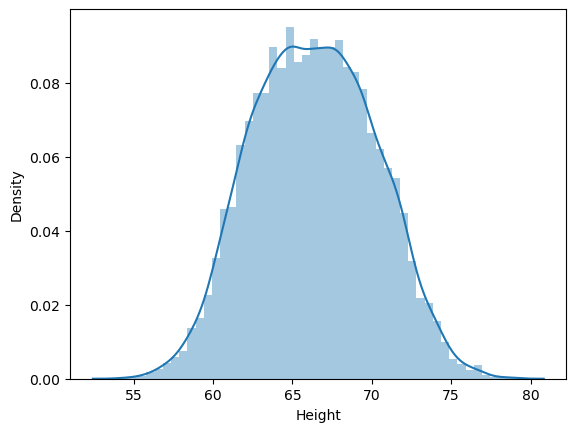

In [5]:
sns.distplot(df["Height"])

<AxesSubplot:ylabel='Height'>

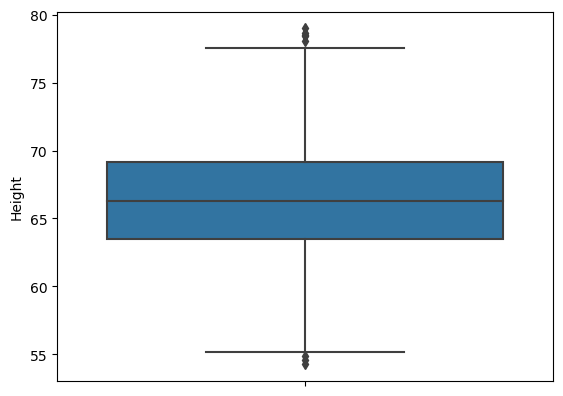

In [8]:
sns.boxplot(y=df["Height"])

<AxesSubplot:ylabel='Weight'>

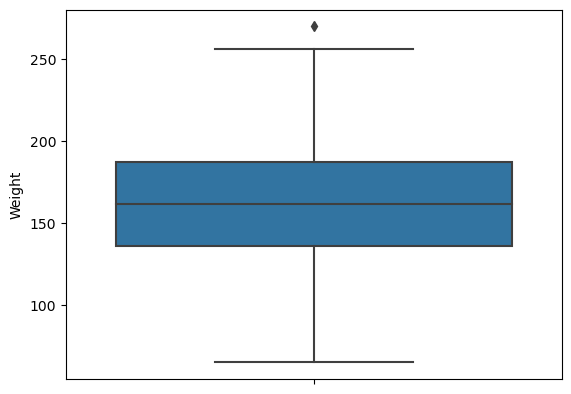

In [23]:
sns.boxplot(y=df["Weight"])

In [9]:
df.describe()

,Height,Weight
count,10000.000000,10000.000000
mean,66.367560,161.440357
std,3.847528,32.108439
min,54.263133,64.700127
25%,63.505620,135.818051
50%,66.318070,161.212928
75%,69.174262,187.169525
max,78.998742,269.989699


In [10]:
min_limit = df["Height"].quantile(0.01)
max_limit = df["Height"].quantile(0.99)

In [11]:
min_limit , max_limit

(58.13441158671655, 74.7857900583366)

In [13]:
df[(df["Height"]>max_limit) | (df["Height"]<min_limit)]

,Gender,Height,Weight
23,Male,75.205974,228.761781
190,Male,76.709835,235.035419
197,Male,75.944460,231.924749
202,Male,75.140821,224.124271
215,Male,74.795375,232.635403
...,...,...,...
9761,Female,56.975279,90.341784
9825,Female,55.979198,85.417534
9895,Female,57.740192,93.652957
9904,Female,57.028857,101.202551


How can we remove these outliers, either we can trim these or we can use capping, if we have less number of rows we will use trimming and if we have large number of rows we use capping. Although here capping would be the best ption, but if we have to use trimming we will use it like this - 

In [15]:
df_new = df[(df["Height"]<max_limit) & (df["Height"]>min_limit)]

<AxesSubplot:ylabel='Height'>

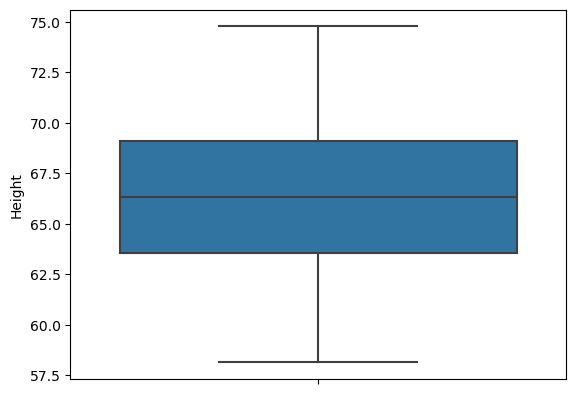

In [17]:
sns.boxplot(y=df_new["Height"])

all the outliers are removed

now we will do capping

In [18]:
df["Height"] = np.where(df["Height"]>max_limit,max_limit, np.where(df["Height"]<min_limit, min_limit, df["Height"]))

In [19]:
df.shape


(10000, 3)

<AxesSubplot:ylabel='Height'>

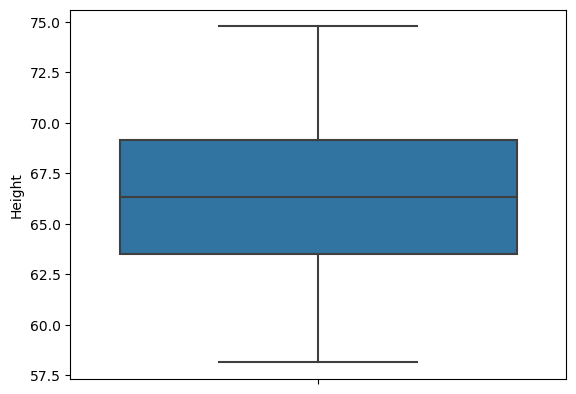

In [21]:
sns.boxplot(y=df["Height"])

All the outliers are removed

<AxesSubplot:ylabel='Weight'>

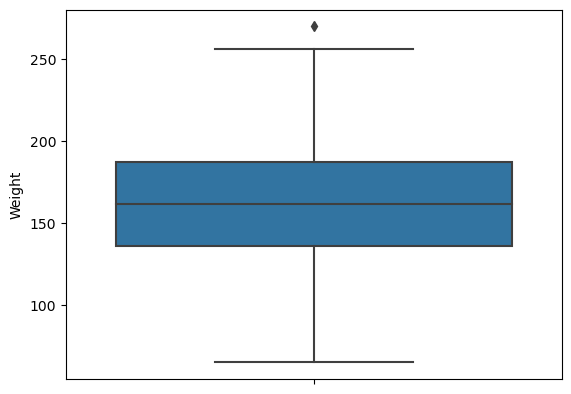

In [22]:
sns.boxplot(y=df["Weight"])